In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# A=np.array([[4,1,1],
#             [1,2,1],
#             [1,1,9]])
# A=np.array([[1,-1,1],
#             [-1,-1,0],
#             [1,0,-1]])
# A=np.array([[-4,5,5],
#             [5,6,5],
#             [5,5,6]])
# A=np.array([[-1,1,-2]
#             ,[1,-1,-2]
#             ,[-2,-2,-2]])
# A=np.array([[1,0,1]
#             ,[0,2,1]
#             ,[1,1,3]])
A=np.array([[1,1],
            [1,1]])
n=len(A)


In [3]:
centers=[]
radias=[]
for i in range(n):
    SumRadias=0
    for j in range(n):
        if(i!=j):
            SumRadias+=abs(A[i][j])
        else:
            continue
    radias.append(SumRadias)
    centers.append(A[i][i])
print("Center's of the",str(n),"Circles are: ",centers)
print("The radius of each",str(n),"*",str(n),"Circle is",radias)


Center's of the 2 Circles are:  [1, 1]
The radius of each 2 * 2 Circle is [1, 1]


In [4]:
def max_element(matrix):
    max_value = abs(matrix[0][1])
    max_index = [0,1]

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i != j and abs(matrix[i, j]) > max_value:
                max_value = abs(matrix[i, j])
                max_index = [i, j]

    return max_index
def solve_equation(a, b, c):
    if b == c:
        return np.pi / 2  

    theta = np.arctan((2*a) /(b-c))    
    return (theta/2)

def GenerateE(i,j,n,theta):
    temp=np.eye(n)
    temp[i][i]=np.cos(theta)
    temp[j][j]=np.cos(theta)
    temp[i][j]=-1*np.sin(theta)
    temp[j][i]=np.sin(theta)
    return temp
def jacobian(A,count,P,max_iter=6):
    count+=1
    temp=max_element(A)
    i,j=temp[0],temp[1]
    theta=solve_equation(A[i][j],A[j][j],A[i][i])
    
    E=GenerateE(i,j,n,theta)
    P.append(E)
    Et=np.transpose(E)
    A_new=np.dot(np.dot(E, A), Et)
    if(count==max_iter):
        return A_new,P
    else:
        return jacobian(A_new, count,P, max_iter)




In [5]:
count=0
P=[]
B,P=jacobian(A,count,P)
eigenvalue=np.array(np.zeros(n))
for i in range(n):
    for j in range(n):
        if(i==j):
            eigenvalue[i]=(B[i][j])


eigenvectors=np.eye(n)
for i in range(len(P)):
    eigenvectors=np.dot(eigenvectors,P[i])
print(eigenvalue)
print(eigenvectors)


[-2.29934717e-17  2.00000000e+00]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


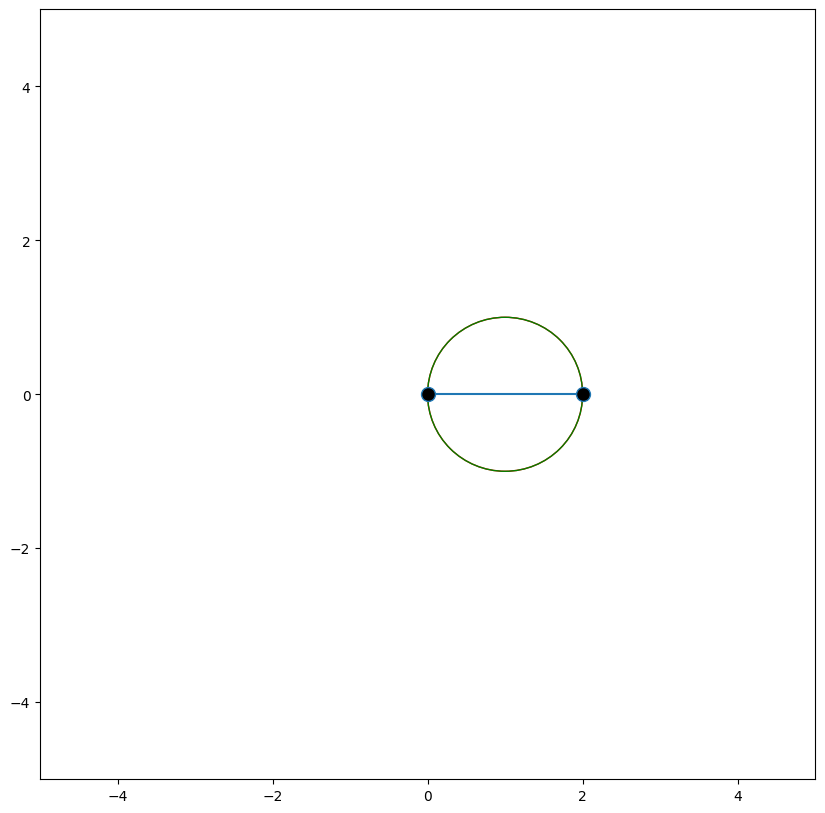

In [6]:

fig , ax=plt.subplots()
fig.set_size_inches(10,10)
clrs = ['r', 'g', 'b','y']  
for i in range(n):
    center = (centers[i],0)
    radius = radias[i]
    circle = Circle(center, radius, fill=False,color=clrs[i])  
    ax.add_artist(circle)
ax.set_xlim(-5, 5)
ax.set_ylim(-5,5)

y=np.zeros(len(eigenvalue))
ax.plot(eigenvalue,y,marker=".", markersize=20, markerfacecolor="black")
plt.show()

